In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

#understanding of data sets 

data = pd.read_csv("Iris.csv")

print(data.head())
print("Dataset shape:", data.shape)
print(data.info())
print(data.isnull().sum())
print(data['Species'].value_counts())
print(data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Dataset shape: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+

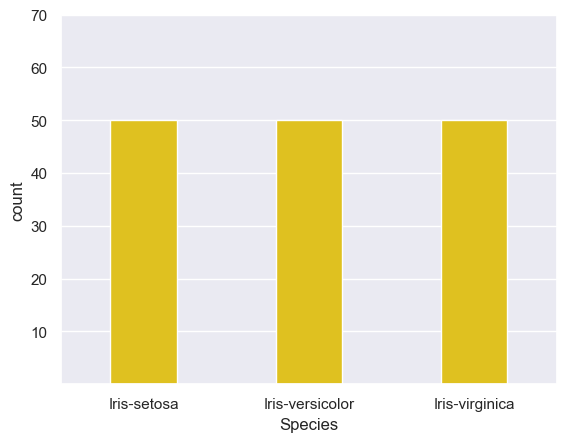

In [2]:
 


#countplot
sns.set(style="darkgrid")
sns.countplot(x="Species", data=data , color="gold", width=0.4)
plt.yticks(range(10 , 80 , 10) , fontweight='medium')
plt.show()


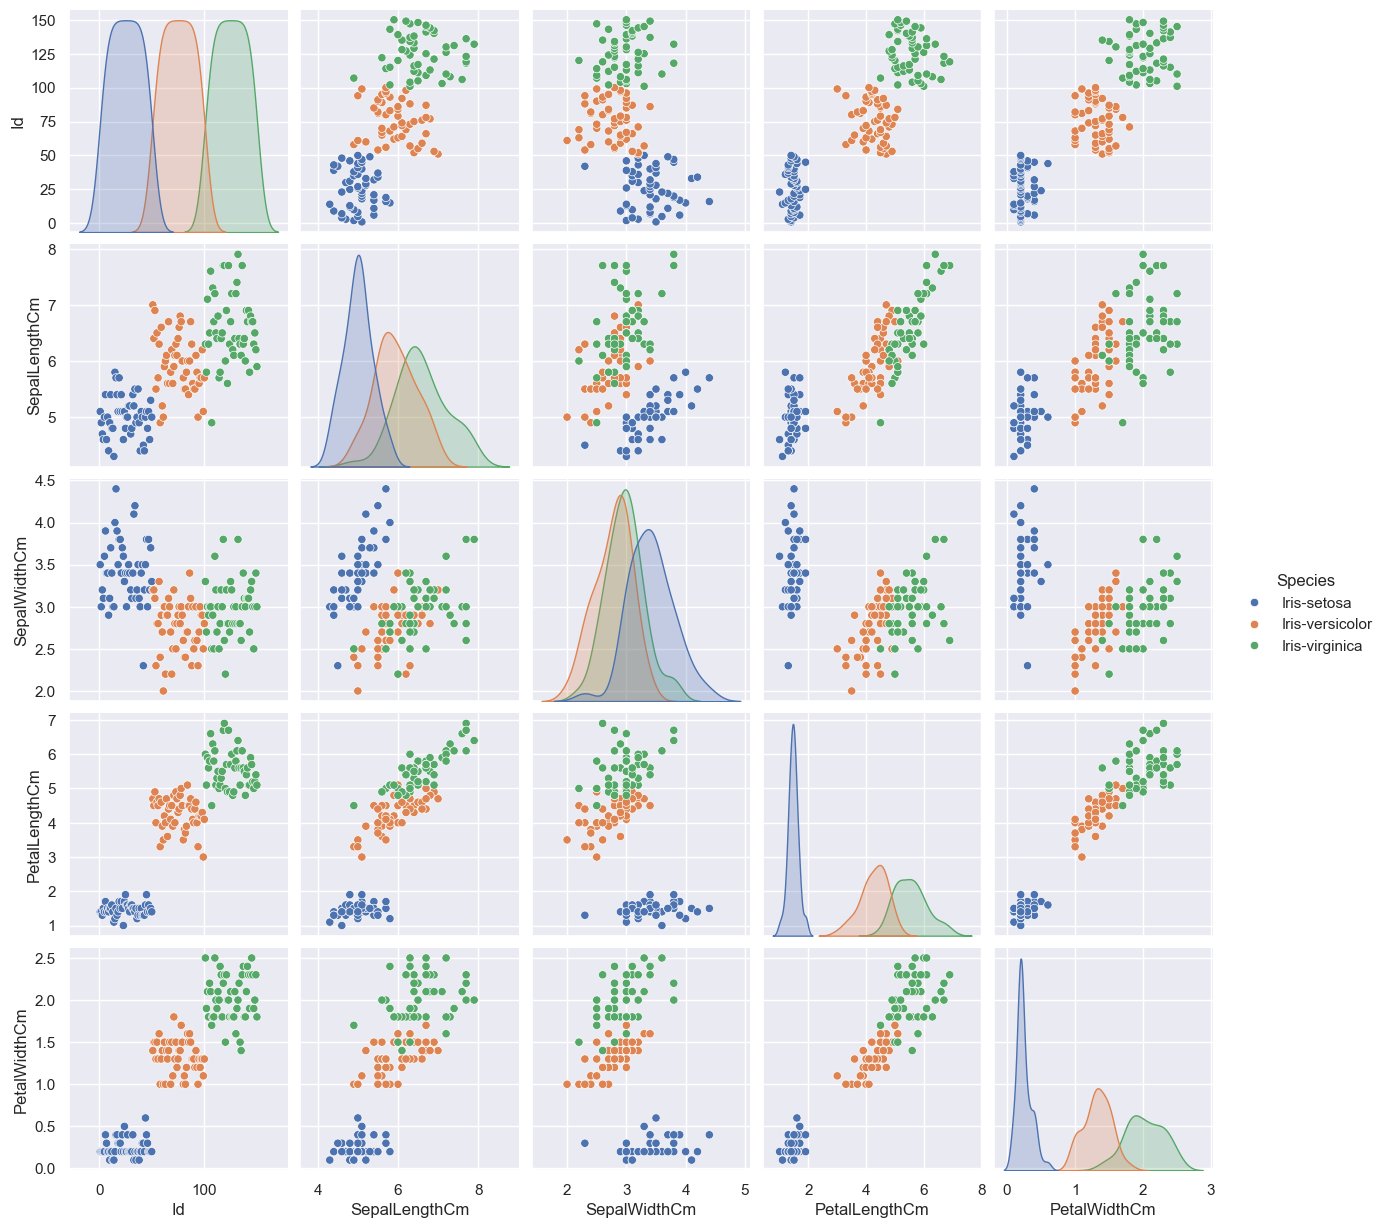

In [3]:

#pairplot
sns.set(style="darkgrid")

sns.pairplot(data, hue="Species" )

plt.show()



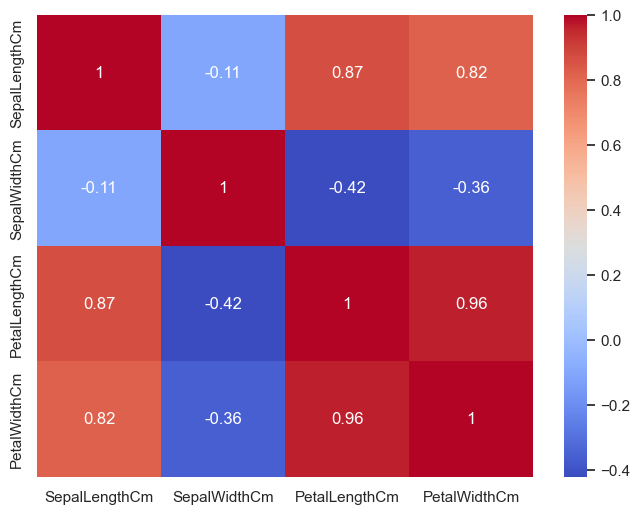

In [4]:
#heatmap


plt.figure(figsize=(8,6)) 

numeric_data = data.drop(["Id", "Species"], axis=1)
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")

plt.show()


In [5]:
# Features (X) and  Target (y)

X = data.drop(["Id", "Species"], axis=1)   
y = data["Species"] 

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (150, 4)
Target shape: (150,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 120
Testing set size: 30


In [7]:
from sklearn.linear_model import LogisticRegression

 
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

 
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
  
  #tree test
  
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

 
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# KNN test
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
from sklearn.metrics import accuracy_score

 
y_pred_logreg = model.predict(X_test)

results = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'KNN': accuracy_score(y_test, y_pred_knn),
}

for name, acc in results.items():
    print(f"{name}: {acc:.3f}")

best_name = max(results, key=results.get)
print("\nBest model:", best_name)


Logistic Regression: 1.000
Decision Tree: 1.000
KNN: 1.000

Best model: Logistic Regression


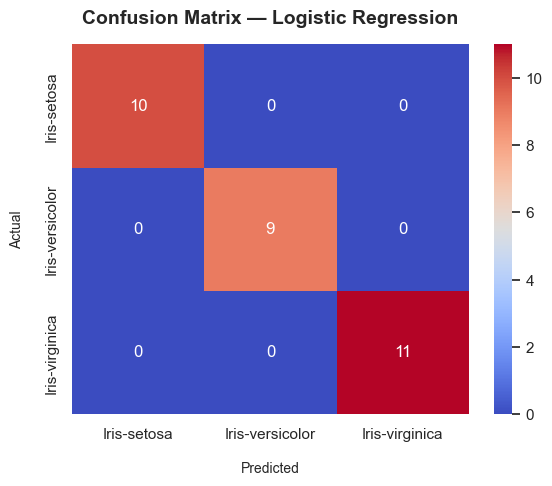

In [12]:
from sklearn.metrics import confusion_matrix

if best_name == 'Logistic Regression':
    cm = confusion_matrix(y_test, y_pred_logreg)
    labels = model.classes_
elif best_name == 'Decision Tree':
    cm = confusion_matrix(y_test, y_pred_dt)
    labels = dt.classes_
else:
    cm = confusion_matrix(y_test, y_pred_knn)
    labels = knn.named_steps['clf'].classes_

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted',labelpad=15 , fontsize = 10)
plt.ylabel('Actual', labelpad=15 , fontsize = 10)
plt.xticks(fontweight = "medium" , fontfamily = "Arial" )
plt.yticks(fontweight = "medium" , fontfamily = "Arial")
plt.title(f'Confusion Matrix — {best_name}', pad=15 ,fontweight = "bold" , fontsize = 14)
plt.show()


In [15]:


best_model = {
    'Logistic Regression': model,
    'Decision Tree': dt,
    'KNN': knn
}[best_name]

joblib.dump(best_model, 'iris_best_model.joblib')
print("Model saved as: iris_best_model.joblib")


Model saved as: iris_best_model.joblib


In [ ]:
import pandas as pd

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=columns)

print("Predicted species:", best_model.predict(sample)[0])


Predicted species: Iris-setosa
